In [241]:
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [242]:
df = pd.read_csv("../../../dataset/messy_housing_data.csv")
df = df[df["price"] != "unavailable"]
df["price"] = df["price"].astype(float)
df.describe(include="all")

,area_sqft,bedrooms,bathrooms,year_built,price,location
count,413.000000,393.000000,413.000000,377.000000,3.630000e+02,413
unique,NaN,NaN,NaN,NaN,NaN,43
top,NaN,NaN,NaN,NaN,NaN,san francisco
freq,NaN,NaN,NaN,NaN,NaN,28
mean,2610.411622,3.587786,3.021792,1959.896552,1.375667e+06,NaN
std,1323.454629,2.390042,1.455492,37.551488,9.913216e+05,NaN
min,-100.000000,1.000000,1.000000,1900.000000,9.640000e+03,NaN
25%,1449.000000,2.000000,2.000000,1926.000000,6.551070e+05,NaN
50%,2592.000000,3.000000,3.000000,1959.000000,1.180883e+06,NaN
75%,3692.000000,5.000000,4.000000,1994.000000,1.885863e+06,NaN


In [243]:
missing_values = df.isnull().sum()
missing_ratio = missing_values / len(df)

treshold = 0.7

less = missing_values[(missing_ratio < treshold ) & (missing_values > 0)].index
over = missing_values[missing_ratio > treshold].index

numeric_features = df[less].select_dtypes(include="number").columns
categorical_features = df[less].select_dtypes(include="object").columns

for col in numeric_features:
    if abs(skew(df[col].dropna())) < 0.5:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())

for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode() [0])

df.drop(columns=over)



,area_sqft,bedrooms,bathrooms,year_built,price,location
0,2696,4.0,1,1962.000000,2068779.98,austin
1,2017,6.0,4,2008.000000,1539208.46,San Francisco
2,1592,3.0,3,1991.000000,557909.70,San Francisco
3,3358,2.0,4,1914.000000,1180883.15,chicago
4,1624,2.0,5,1935.000000,716945.96,New York City
...,...,...,...,...,...,...
412,3674,5.0,5,1959.896552,2664238.68,l.a.
413,939,3.0,5,1965.000000,491056.77,Los Angeles
414,4880,3.0,3,2004.000000,3709981.28,boston
415,3279,5.0,5,1935.000000,1308383.30,Chicago


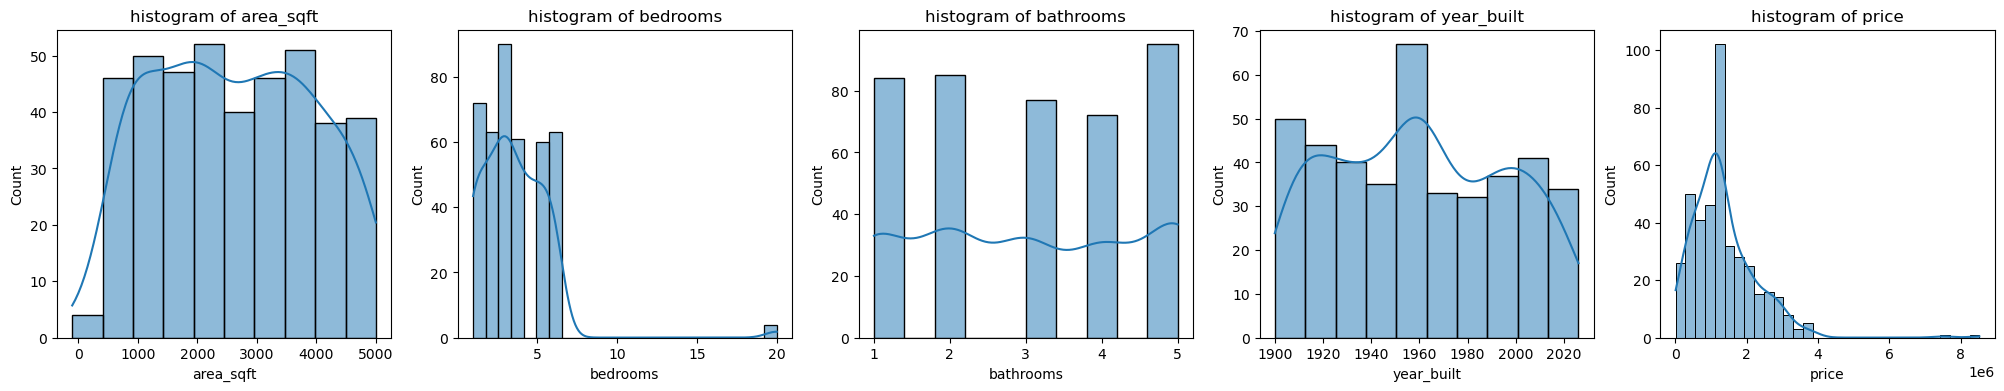

In [244]:
numeric_features = df.select_dtypes(include="number").columns
plt.figure(figsize=(5 * len(numeric_features), 4))

for i,col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"histogram of {col}")


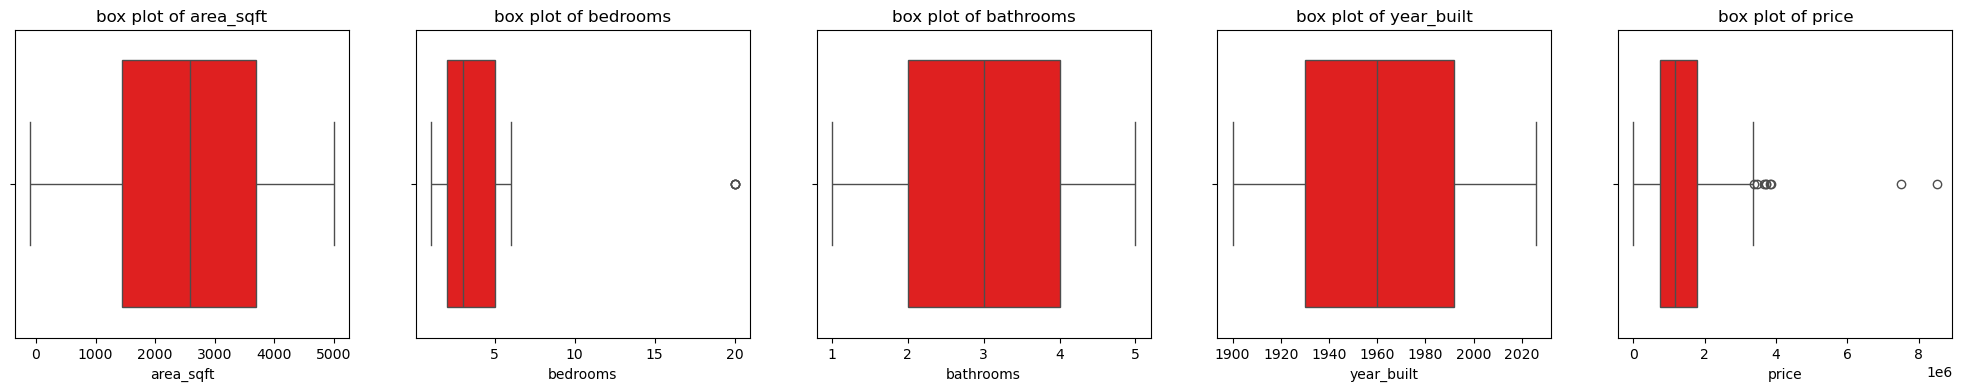

In [245]:
plt.figure(figsize=(5 * len(numeric_features), 4))


for i,col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features), i+1)
    sns.boxplot(x=df[col], color="red")
    plt.title(f"box plot of {col}")
    

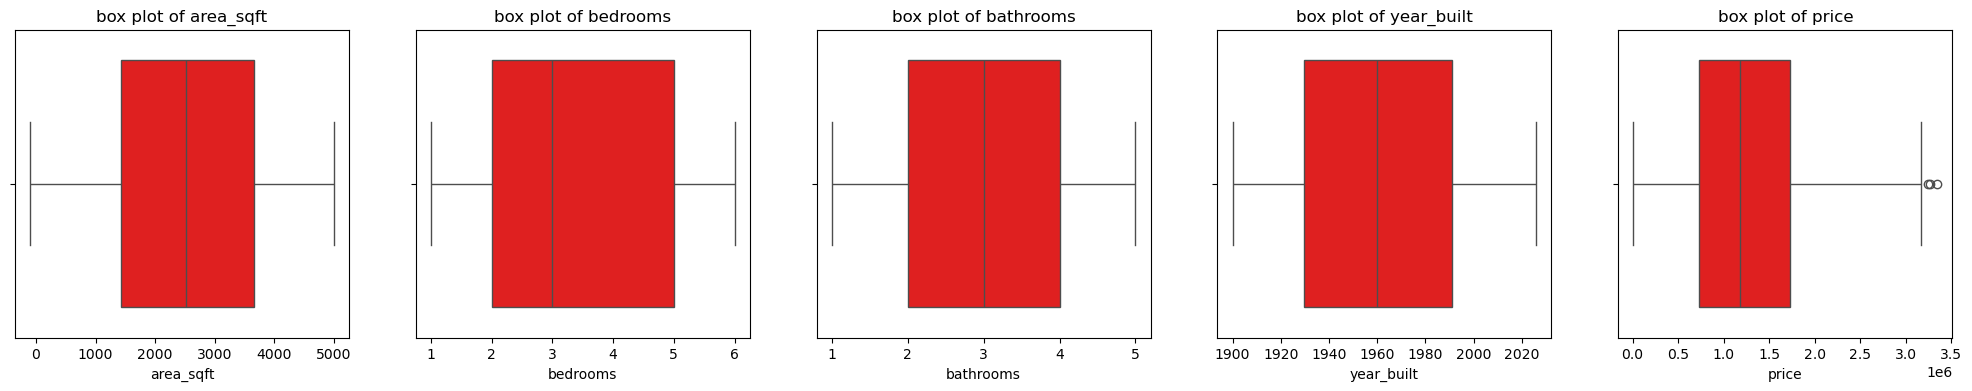

In [246]:


Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

lower_fance = Q1 - 1.5 * IQR
upper_fance = Q3 + 1.5 * IQR

condition = ~((df[numeric_features] < lower_fance) | (df[numeric_features] > upper_fance)).any(axis=1)
df = df.loc[condition]

plt.figure(figsize=(5 * len(numeric_features), 4))


for i,col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features), i+1)
    sns.boxplot(x=df[col], color="red")
    plt.title(f"box plot of {col}")


<Axes: xlabel='bedrooms', ylabel='price'>

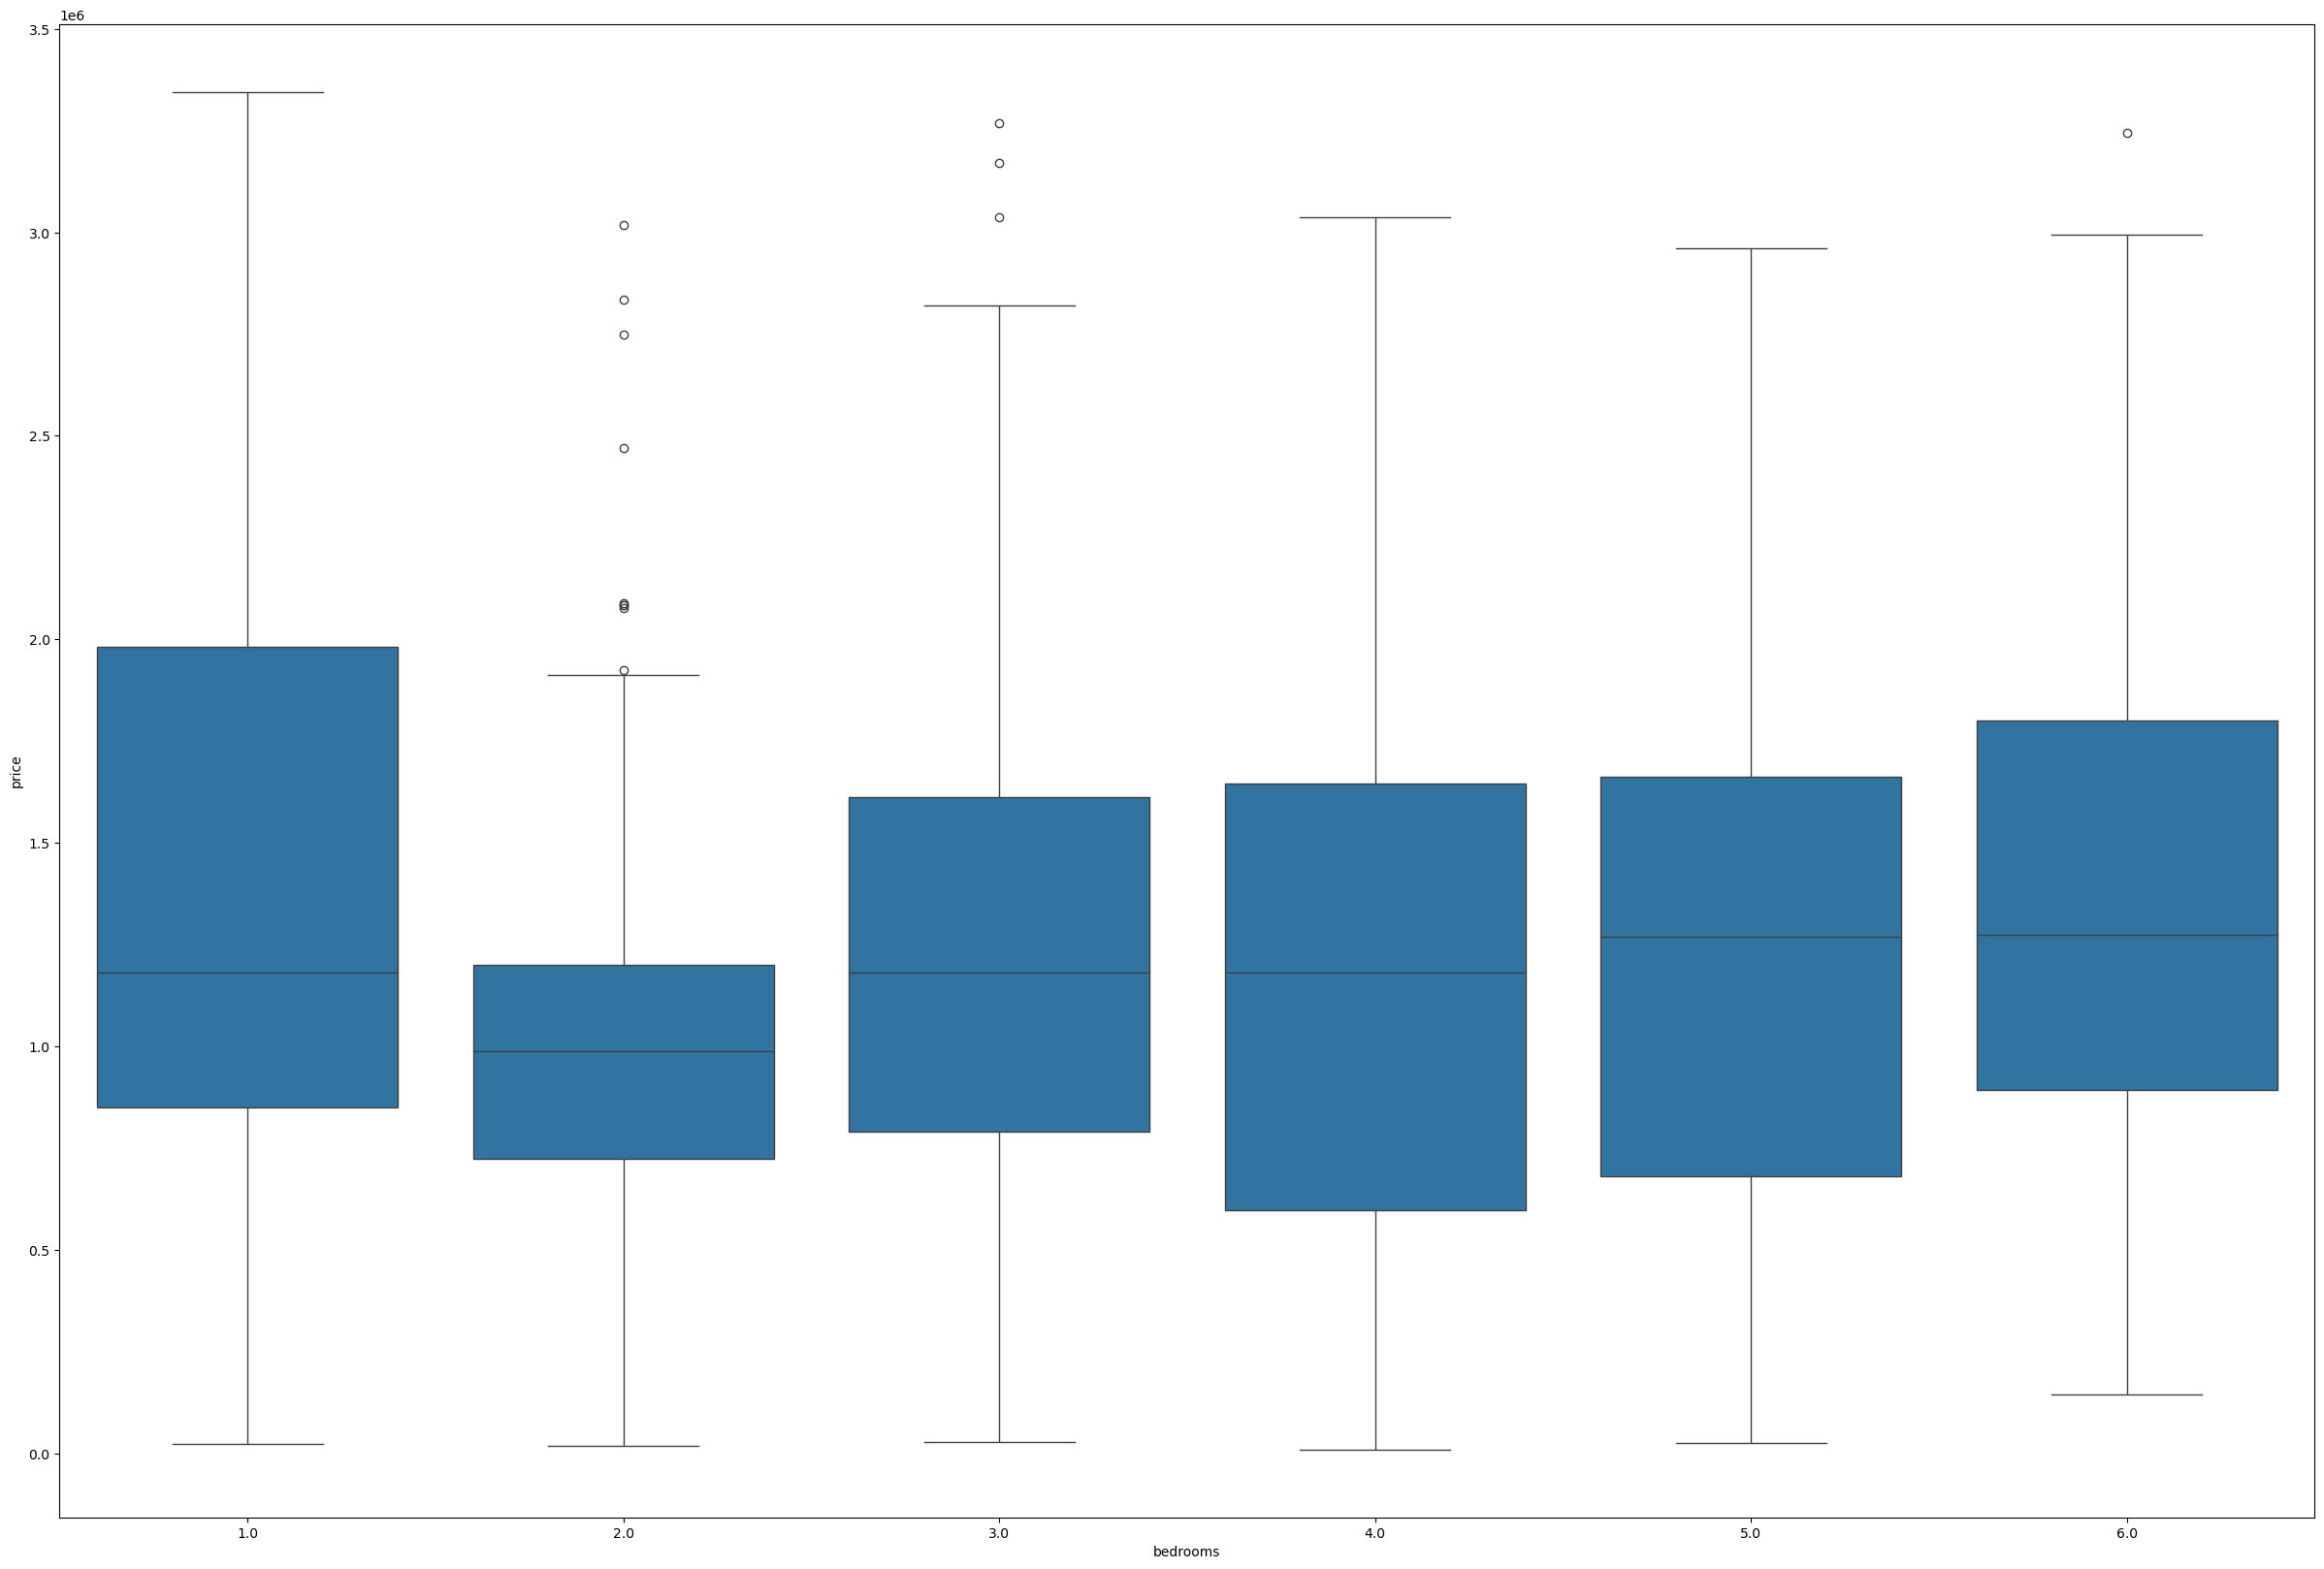

In [247]:

plt.figure(figsize=(30,20))
sns.boxplot(x='bedrooms', y='price', data=df)

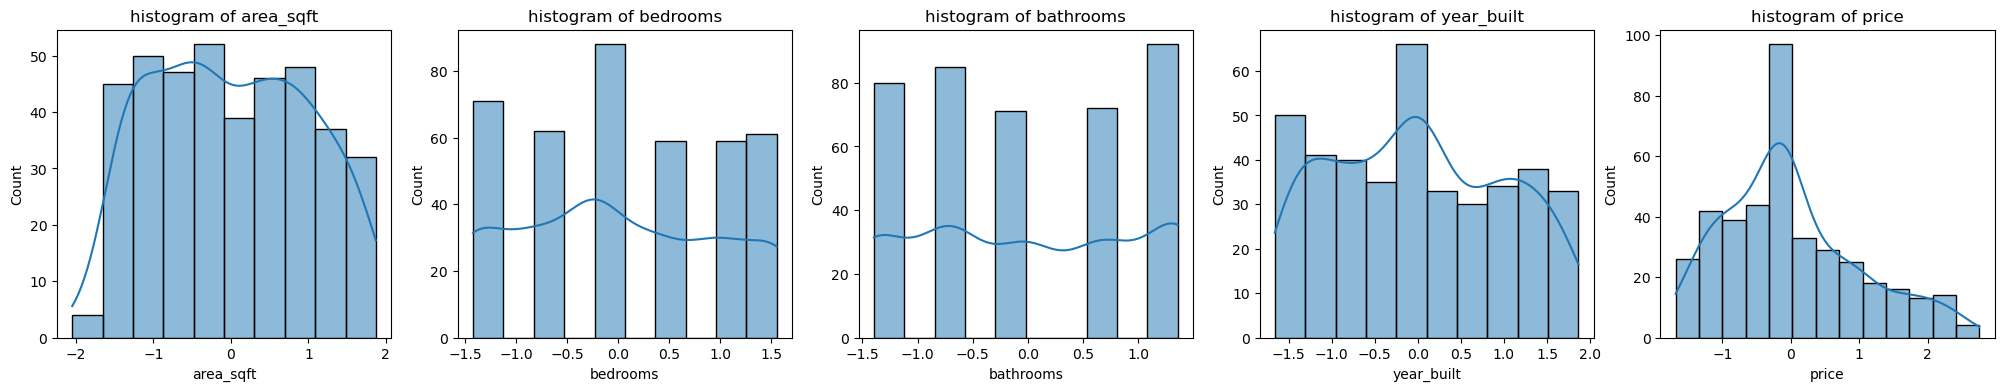

In [248]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])   

plt.figure(figsize=(5 * len(numeric_features), 4))

for i,col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"histogram of {col}")




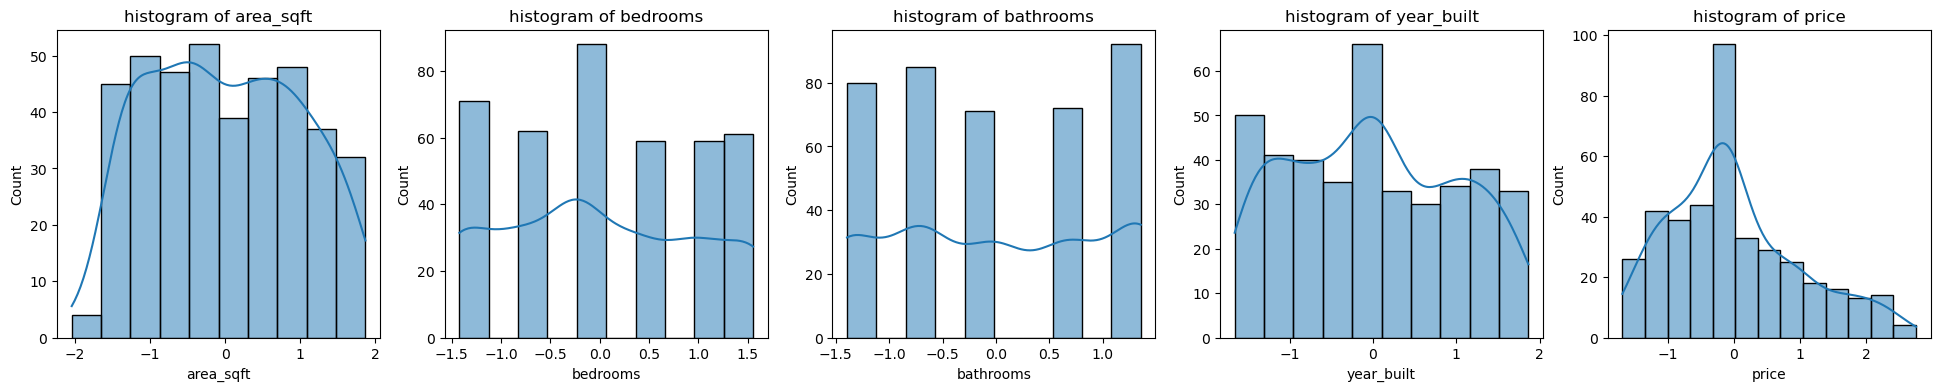

In [249]:
numeric_features = df.select_dtypes(include="number")
plt.figure(figsize=(5 * len(numeric_features), 4))

for i,col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"histogram of {col}")

In [250]:
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.6091216018763997
R2 Score: 0.3742117043743227
